<a href="https://colab.research.google.com/github/FiyinfobaO/used_cars_price_prediction/blob/master/feature_selection_and_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copying dataset from drive to colab current directory
!cp '/content/drive/MyDrive/EDA_used_cars.csv' '/content/'

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 57kB/s 


In [ ]:
# Import libraries
import gc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor
import pickle
%matplotlib inline

####Check for multicollinearity

In [ ]:
# read the csv
df_n = pd.read_csv('EDA_used_cars.csv')

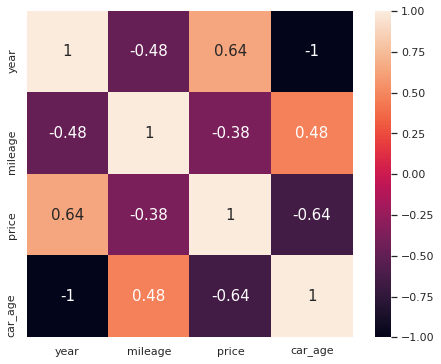

In [ ]:
plt.subplots(figsize=(8,6))
sns.heatmap(df_n.corr(), annot=True, square=True, annot_kws={'fontsize':15})
plt.show()

There is multicollinearity between the year and car_age; so we'll pick one when building the model

In [ ]:
df_n

,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price,car_age
0,Acura,Mdx,2008,105242,Nigerian used,D,Petrol,Automatic,grey,2586000,13
1,Toyota,Highlander,2001,152321,Nigerian used,C,Petrol,Automatic,green,1914000,20
2,Ford,Explorer,2014,60187,Nigerian used,C,Petrol,Automatic,brown,4154000,7
3,Toyota,Camry,2002,145156,Nigerian used,E,Petrol,Automatic,black,1354000,19
4,Toyota,Corolla,2007,192775,Nigerian used,D,Petrol,Automatic,gold,1522000,14
...,...,...,...,...,...,...,...,...,...,...,...
2555,Toyota,Solara,2008,148221,Foreign used,D,Petrol,Automatic,silver,1578000,13
2556,Honda,Accord,2012,134811,Nigerian used,E,Petrol,Automatic,black,1538750,9
2558,Lexus,Rx,2006,159386,Nigerian used,D,Hybrid,Automatic,grey,2045000,15
2559,Ford,Escape,2003,137494,Nigerian used,E,Petrol,Automatic,beige,682000,18


In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   manufacturer       2506 non-null   object
 1   model              2506 non-null   object
 2   year               2506 non-null   int64 
 3   mileage            2506 non-null   int64 
 4   selling_condition  2506 non-null   object
 5   grade              2506 non-null   object
 6   fuel               2506 non-null   object
 7   transmission       2506 non-null   object
 8   color              2506 non-null   object
 9   price              2506 non-null   int64 
 10  car_age            2506 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 314.9+ KB


In [ ]:
# converting all categorical columns to lower case
df_n.manufacturer = df_n.manufacturer.str.lower()
df_n.model = df_n.model.str.lower()
df_n.selling_condition = df_n.selling_condition.str.lower()
df_n.grade = df_n.grade.str.lower()
df_n.fuel = df_n.fuel.str.lower()
df_n.transmission = df_n.transmission.str.lower()

In [ ]:
df_n

,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price,car_age
0,acura,mdx,2008,105242,nigerian used,d,petrol,automatic,grey,2586000,13
1,toyota,highlander,2001,152321,nigerian used,c,petrol,automatic,green,1914000,20
2,ford,explorer,2014,60187,nigerian used,c,petrol,automatic,brown,4154000,7
3,toyota,camry,2002,145156,nigerian used,e,petrol,automatic,black,1354000,19
4,toyota,corolla,2007,192775,nigerian used,d,petrol,automatic,gold,1522000,14
...,...,...,...,...,...,...,...,...,...,...,...
2555,toyota,solara,2008,148221,foreign used,d,petrol,automatic,silver,1578000,13
2556,honda,accord,2012,134811,nigerian used,e,petrol,automatic,black,1538750,9
2558,lexus,rx,2006,159386,nigerian used,d,hybrid,automatic,grey,2045000,15
2559,ford,escape,2003,137494,nigerian used,e,petrol,automatic,beige,682000,18


In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   manufacturer       2506 non-null   object
 1   model              2506 non-null   object
 2   year               2506 non-null   int64 
 3   mileage            2506 non-null   int64 
 4   selling_condition  2506 non-null   object
 5   grade              2506 non-null   object
 6   fuel               2506 non-null   object
 7   transmission       2506 non-null   object
 8   color              2506 non-null   object
 9   price              2506 non-null   int64 
 10  car_age            2506 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 314.9+ KB


####Encoding the categorical features

#####Manufacturer

In [ ]:
# manufacturer
le_manufacturer = LabelEncoder()
le_manufacturer.fit(df_n['manufacturer'])
# save the manufacturer encoder
pickle.dump(le_manufacturer, open('manufacturer_encoder.pkl', 'wb'))
# copy to drive
! cp '/content/manufacturer_encoder.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'
# transform the manufacturer column
df_n['manufacturer'] = le_manufacturer.transform(df_n['manufacturer'])

In [ ]:
df_n['manufacturer']

0        0
1       45
2       10
3       45
4       45
        ..
2555    45
2556    14
2558    24
2559    10
2560    24
Name: manufacturer, Length: 2506, dtype: int64

######Checking that the encoder works fine

In [ ]:
a = 'Acura'
b = np.array(a.lower()).ravel()
b

array(['acura'], dtype='<U5')

In [ ]:
man_enco_test.transform(b)

array([0])

In [ ]:
# load and reuse encoder 
man_enco_test = pickle.load(open('manufacturer_encoder.pkl', 'rb'))
random_manufac = 'TOYOTA'
random_manufac = np.array(random_manufac.lower()).ravel()
trans_random_manufac = man_enco_test.transform(random_manufac)

In [ ]:
trans_random_manufac

array([45])

#####Model

In [ ]:
# model
le_model = LabelEncoder()
le_model.fit(df_n['model'])
# save the manufacturer encoder
pickle.dump(le_model, open('model_encoder.pkl', 'wb'))
# copy to drive
! cp '/content/model_encoder.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'
# transform the manufacturer column
df_n['model'] = le_model.transform(df_n['model'])

#####Selling_condition

In [ ]:
# selling_condition
le_selling_condition = LabelEncoder()
le_selling_condition.fit(df_n['selling_condition'])
# save the manufacturer encoder
pickle.dump(le_selling_condition, open('selling_condition_encoder.pkl', 'wb'))
# copy to drive
! cp '/content/selling_condition_encoder.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'
# transform the manufacturer column
df_n['selling_condition'] = le_selling_condition.transform(df_n['selling_condition'])

#####Fuel

In [ ]:
# fuel
le_fuel = LabelEncoder()
le_fuel.fit(df_n['fuel'])
# save the manufacturer encoder
pickle.dump(le_fuel, open('fuel_encoder.pkl', 'wb'))
# copy to drive
! cp '/content/fuel_encoder.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'
# transform the manufacturer column
df_n['fuel'] = le_fuel.transform(df_n['fuel'])

#####Grade

In [ ]:
# grade
le_grade = LabelEncoder()
le_grade.fit(df_n['grade'])
# save the manufacturer encoder
pickle.dump(le_grade, open('grade_encoder.pkl', 'wb'))
# copy to drive
! cp '/content/grade_encoder.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'
# transform the manufacturer column
df_n['grade'] = le_grade.transform(df_n['grade'])

#####Transmission

In [ ]:
# transmission
le_transmission = LabelEncoder()
le_transmission.fit(df_n['transmission'])
# save the manufacturer encoder
pickle.dump(le_transmission, open('transmission_encoder.pkl', 'wb'))
# copy to drive
! cp '/content/transmission_encoder.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'
# transform the manufacturer column
df_n['transmission'] = le_transmission.transform(df_n['transmission'])

#####Color

In [ ]:
# color
le_color = LabelEncoder()
le_color.fit(df_n['color'])
# save the manufacturer encoder
pickle.dump(le_color, open('color_encoder.pkl', 'wb'))
# copy to drive
! cp '/content/color_encoder.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'
# transform the manufacturer column
df_n['color'] = le_color.transform(df_n['color'])

In [ ]:
df_n.head()

,manufacturer,model,year,mileage,selling_condition,grade,fuel,transmission,color,price,car_age
0,0,197,2008,105242,1,2,3,0,8,2586000,13
1,45,163,2001,152321,1,1,3,0,7,1914000,20
2,10,121,2014,60187,1,1,3,0,4,4154000,7
3,45,62,2002,145156,1,3,3,0,2,1354000,19
4,45,85,2007,192775,1,2,3,0,6,1522000,14


In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   manufacturer       2506 non-null   int64
 1   model              2506 non-null   int64
 2   year               2506 non-null   int64
 3   mileage            2506 non-null   int64
 4   selling_condition  2506 non-null   int64
 5   grade              2506 non-null   int64
 6   fuel               2506 non-null   int64
 7   transmission       2506 non-null   int64
 8   color              2506 non-null   int64
 9   price              2506 non-null   int64
 10  car_age            2506 non-null   int64
dtypes: int64(11)
memory usage: 314.9 KB


####Modelling

#####Without Feature Selection

Selecting all the features except 'car_age'

In [ ]:
# rearrange columns for simplicity
df_n1 = df_n[['year','manufacturer','model','fuel','mileage', 'grade', 'transmission', 'selling_condition','color', 'price']]

In [ ]:
# selecting features, X
X = df_n1.iloc[:, :-1].values
# selecting labels, y
y = df_n1.iloc[:, -1].values

In [ ]:
# to split the data
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (2004, 9) (2004,)
Test set:  (502, 9) (502,)


In [ ]:
# define scaler
scaler = StandardScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# save the scaler
pickle.dump(scaler, open('standard_scaler.pkl', 'wb'))
# transform the training dataset
X_train_scaled = scaler.transform(X_train)
# transform the test dataset
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test[0]

array([  2012,     14,     30,      3, 103412,      1,      0,      1,
            9])

In [ ]:
X_test_scaled[0]

array([ 1.15135623, -1.04327073, -1.26450474,  0.09982081, -0.65242525,
       -1.09843943, -0.29904409,  0.59425564,  0.16826249])

In [ ]:
v = [[2000,0,46,1,344345,2,1,0,17]] # must be a 2D array
v_s = scaler.transform(v)

In [ ]:
v_s

array([[0.33333333, 0.        , 0.13981763, 0.2       , 0.99615244,
        0.5       , 0.33333333, 0.        , 0.94444444]])

***For prediction purposes*: The data must be arranged in the same order it was arranged when scaling and it must be a 2d array**

######**Linear Regression**

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
# to create the linear reg model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)  # fit the model to train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# to evaluate test set values
y_pred = lin_reg.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred), 3))

Mean Absolute Error:  754530.408
Mean Squared Error:  953656368404.485
Root Mean Squared Error:  976553.311
R2 score:  0.556


In [ ]:
evaluate(lin_reg, X_train_scaled, y_train)
evaluate(lin_reg, X_test_scaled, y_test)

Model Performance
Accuracy = 53.29%.
Model Performance
Accuracy = 51.89%.


51.88835107428476

######**Polynomial regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial transformation of degree 2
poly_features = PolynomialFeatures(degree = 2)
# Returns a transformed version of X with new features
poly_features.fit(X_train_scaled)
X_train_scaled_poly = poly_features.transform(X_train_scaled)
# save the scaler
pickle.dump(poly_features, open('poly_feature.pkl', 'wb'))
# transform test
X_test_scaled_poly = poly_features.transform(X_test_scaled)


In [ ]:
poly_reg = LinearRegression()
poly_reg_score = cross_val_score(poly_reg, X_train_scaled_poly, y_train, verbose = 2)
poly_reg_score

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


array([0.55180094, 0.61303162, 0.512237  , 0.57873961, 0.54709357])

In [ ]:
poly_reg.fit(X_train_scaled_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_scaled_poly)
poly_reg.score(X_test_scaled_poly, y_test)

0.580575495042168

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred_poly), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred_poly), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred_poly), 3))

Mean Absolute Error:  705354.35
Mean Squared Error:  901354200894.197
Root Mean Squared Error:  949396.756
R2 score:  0.581


######**Decision Trees**

In [ ]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_scaled, y_train.ravel())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_predDT = dec_tree.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predDT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predDT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predDT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predDT), 3))

Mean Absolute Error:  690152.323
Mean Squared Error:  1050548861584.076
Root Mean Squared Error:  1024962.859
R2 score:  0.511


In [ ]:
evaluate(dec_tree, X_train_scaled, y_train)
evaluate(dec_tree, X_test_scaled, y_test)

Model Performance
Accuracy = 100.00%.
Model Performance
Accuracy = 58.41%.


58.41263615527036

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt'],
              'max_depth': np.arange(5, 36, 5),
              'min_samples_split': [5, 10, 20, 40],
              'min_samples_leaf': [2, 6, 12, 24],
             }
tree_reg = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
tree_reg.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Randomized Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          tree_reg.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          tree_reg.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          tree_reg.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.0s



 Results from Randomized Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

 The best score across ALL searched params:
 0.5737913773855094

 The best parameters across ALL searched params:
 {'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 15}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.9s finished


In [ ]:
new_dec_tree = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=6, max_features='auto', max_depth=15, random_state=42)
new_dec_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_predDT = new_dec_tree.predict(X_test_scaled)
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predDT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predDT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predDT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predDT), 3))

Mean Absolute Error:  676501.759
Mean Squared Error:  941374659086.483
Root Mean Squared Error:  970244.639
R2 score:  0.562


In [ ]:
evaluate(new_dec_tree, X_train_scaled, y_train)
evaluate(new_dec_tree, X_test_scaled, y_test)

Model Performance
Accuracy = 76.49%.
Model Performance
Accuracy = 60.34%.


60.341442315784676

######**Random Forest Regressor**

In [ ]:
rfr = RandomForestRegressor(n_estimators=800, random_state=42)
rfr.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predRF = rfr.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  537542.017
Mean Squared Error:  557192432238.017
Root Mean Squared Error:  746453.235
R2 score:  0.741


In [ ]:
evaluate(rfr, X_train_scaled, y_train)
evaluate(rfr, X_test_scaled, y_test)

Model Performance
Accuracy = 88.48%.
Model Performance
Accuracy = 66.23%.


66.23345437428205

In [ ]:
# to find the best parameters for random forest
model = RandomForestRegressor()
n_estimators = [10, 50, 100, 250, 400, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

parameters = {'n_estimators': n_estimators,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
              'max_features': max_features}

grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train_scaled, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6560154567219029

 The best parameters across ALL searched params:
 {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 400}


In [ ]:
# using best parameters gotten from the grid search
rfr1 = RandomForestRegressor(random_state=42, n_estimators=400, min_samples_split=7)
rfr1.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predRF = rfr1.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  545419.185
Mean Squared Error:  567550461688.558
Root Mean Squared Error:  753359.451
R2 score:  0.736


In [ ]:
evaluate(rfr1, X_train_scaled, y_train)
evaluate(rfr1, X_test_scaled, y_test)

Model Performance
Accuracy = 83.17%.
Model Performance
Accuracy = 65.71%.


65.70987157417133

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 20, 40]
min_samples_leaf = [1, 2, 4, 6, 12, 24]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Randomized Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          rf_random.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          rf_random.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          rf_random.best_params_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.0min finished



 Results from Randomized Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6539252681648922

 The best parameters across ALL searched params:
 {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}


In [ ]:
# using the best parameters gotten from the randomized search
rfr2 = RandomForestRegressor(random_state=42, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_depth=60)
rfr2.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predRF = rfr2.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  538487.082
Mean Squared Error:  558446965722.571
Root Mean Squared Error:  747293.092
R2 score:  0.74


In [ ]:
evaluate(rfr2, X_train_scaled, y_train)
evaluate(rfr2, X_test_scaled, y_test)

Model Performance
Accuracy = 88.50%.
Model Performance
Accuracy = 66.12%.


66.12256099440617

######**Extra Trees Regressor**

In [ ]:
et = ExtraTreesRegressor(n_estimators=400, random_state=42)
et.fit(X_train_scaled, y_train.ravel())

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=400, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predET = et.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predET), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predET), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predET)), 3))
print('R2 score: ', round(r2_score(y_test, y_predET), 3))

Mean Absolute Error:  602741.9
Mean Squared Error:  710104077155.388
Root Mean Squared Error:  842676.733
R2 score:  0.67


In [ ]:
evaluate(et, X_train_scaled, y_train)
evaluate(et, X_test_scaled, y_test)

Model Performance
Accuracy = 100.00%.
Model Performance
Accuracy = 63.58%.


63.57936788920714

######**ADA BOOST REGRESSOR**

In [ ]:
ada = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=600, random_state=42)
ada.fit(X_train_scaled, y_train.ravel())

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [ ]:
y_predADA = ada.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predADA), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predADA), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predADA)), 3))
print('R2 score: ', round(r2_score(y_test, y_predADA), 3))

Mean Absolute Error:  511625.48
Mean Squared Error:  519281355876.655
Root Mean Squared Error:  720611.793
R2 score:  0.758


In [ ]:
evaluate(ada, X_train_scaled, y_train)
evaluate(ada, X_test_scaled, y_test)

Model Performance
Accuracy = 96.69%.
Model Performance
Accuracy = 69.76%.


69.7639212029077

######**XGBRegressor**

In [ ]:
xgb = XGBRegressor(n_estimators=1000, random_state=42)
xgb.fit(X_train_scaled, y_train.ravel())

[23:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_predXGB = xgb.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGB), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGB), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGB)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGB), 3))

Mean Absolute Error:  501294.316
Mean Squared Error:  495518516127.192
Root Mean Squared Error:  703930.761
R2 score:  0.769


In [ ]:
evaluate(xgb, X_train_scaled, y_train)
evaluate(xgb, X_test_scaled, y_test)

Model Performance
Accuracy = 85.25%.
Model Performance
Accuracy = 70.63%.


70.63452965827922

######**XGBRFRegressor**

In [ ]:
xgbrf = XGBRFRegressor(n_estimators=500, random_state=42)
xgbrf.fit(X_train_scaled, y_train.ravel())

[23:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_predXGBRF = xgbrf.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGBRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGBRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGBRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGBRF), 3))

Mean Absolute Error:  754670.875
Mean Squared Error:  956047469833.201
Root Mean Squared Error:  977776.8
R2 score:  0.555


In [ ]:
evaluate(xgbrf, X_train_scaled, y_train)
evaluate(xgbrf, X_test_scaled, y_test)

Model Performance
Accuracy = 53.75%.
Model Performance
Accuracy = 47.25%.


47.25401529024798

######**LGBMRegressor**

In [ ]:
lgbm = LGBMRegressor(n_estimators=100, random_state=42)
lgbm.fit(X_train_scaled, y_train.ravel())

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_predLGBM = lgbm.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predLGBM), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predLGBM), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predLGBM)), 3))
print('R2 score: ', round(r2_score(y_test, y_predLGBM), 3))

Mean Absolute Error:  481862.136
Mean Squared Error:  469178207270.943
Root Mean Squared Error:  684965.844
R2 score:  0.782


In [ ]:
evaluate(lgbm, X_train_scaled, y_train)
evaluate(lgbm, X_test_scaled, y_test)

Model Performance
Accuracy = 81.98%.
Model Performance
Accuracy = 72.28%.


72.28047329599998

######**GRADIENT BOOST REGRESSOR**

In [ ]:
param_grid = {"learning_rate"    : [0.01, 0.1, 0.3, 0.5,0.9, 1.2, 1.5],
              "subsample"        : [0.5, 1.0],
              "max_depth"        : [3, 4, 5, 10, 15, 20],
              "max_features"     : ['auto', 'sqrt'],
              "min_samples_split": [5, 10, 20, 40],
              "min_samples_leaf" : [2, 6, 12, 24]
             }
grad_reg = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
grad_reg.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Randomized Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grad_reg.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          grad_reg.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          grad_reg.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished



 Results from Randomized Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.7325262689338405

 The best parameters across ALL searched params:
 {'subsample': 1.0, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 5, 'learning_rate': 0.1}


In [ ]:
grad_reg = GradientBoostingRegressor(n_estimators=200, subsample=1, min_samples_split=10, min_samples_leaf=6, max_features='auto', max_depth=5, random_state=42)
grad_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_predGRAD = grad_reg.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predGRAD), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predGRAD), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predGRAD)), 3))
print('R2 score: ', round(r2_score(y_test, y_predGRAD), 3))

Mean Absolute Error:  494123.545
Mean Squared Error:  477868260947.161
Root Mean Squared Error:  691280.161
R2 score:  0.778


In [ ]:
evaluate(grad_reg, X_train_scaled, y_train)
evaluate(grad_reg, X_test_scaled, y_test)

Model Performance
Accuracy = 83.88%.
Model Performance
Accuracy = 71.19%.


71.1936654739811

######**CATBOOST REGRESSOR**

In [ ]:
# to find the best parameters for catboost
model = CatBoostRegressor()
parameters = {'depth'         : [6,8,10,12,14,16,18,20],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
              'iterations'    : [30, 50, 100]
              }
grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train_scaled, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 1244826.3688470	total: 54.7ms	remaining: 2.68s
1:	learn: 1100056.2381017	total: 57.4ms	remaining: 1.38s
2:	learn: 1014663.1292207	total: 60.9ms	remaining: 954ms
3:	learn: 933708.4574263	total: 64.7ms	remaining: 744ms
4:	learn: 879431.1864297	total: 68.5ms	remaining: 617ms
5:	learn: 857011.9177344	total: 72.2ms	remaining: 530ms
6:	learn: 835787.0707648	total: 76.1ms	remaining: 468ms
7:	learn: 827404.6096692	total: 79.9ms	remaining: 419ms
8:	learn: 814372.2727171	total: 83.6ms	remaining: 381ms
9:	learn: 801426.5079775	total: 87.2ms	remaining: 349ms
10:	learn: 793259.4693040	total: 91.2ms	remaining: 323ms
11:	learn: 776218.3785022	total: 95.4ms	remaining: 302ms
12:	learn: 765173.2180239	total: 99.6ms	remaining: 284ms
13:	learn: 748957.7305029	total: 104ms	remaining: 266ms
14:	learn: 742539.0032598	total: 107ms	remaining: 251ms
15:	learn: 738740.9224924	total: 111ms	remaining: 237ms
16:	learn: 729402.8567963	total: 115ms	remaining: 223ms
17:	learn: 726399.1509962	total: 119ms	rem

In [ ]:
#using the best parameters gotten above
cat_reg = CatBoostRegressor(depth=4, iterations=600, learning_rate=0.1, random_state=42)
cat_reg.fit(X_train_scaled, y_train.ravel())

0:	learn: 1498451.6298831	total: 760us	remaining: 455ms
1:	learn: 1443897.4896173	total: 2.21ms	remaining: 662ms
2:	learn: 1391775.6303487	total: 3.11ms	remaining: 619ms
3:	learn: 1344732.1376179	total: 3.99ms	remaining: 594ms
4:	learn: 1301470.7365607	total: 5.18ms	remaining: 617ms
5:	learn: 1262000.6692141	total: 6.29ms	remaining: 622ms
6:	learn: 1230429.0464305	total: 7.31ms	remaining: 619ms
7:	learn: 1198788.1094709	total: 8.32ms	remaining: 615ms
8:	learn: 1170525.1357650	total: 9.31ms	remaining: 611ms
9:	learn: 1149606.3374846	total: 10.3ms	remaining: 608ms
10:	learn: 1128439.2127565	total: 11.3ms	remaining: 608ms
11:	learn: 1107389.9756288	total: 12.3ms	remaining: 604ms
12:	learn: 1093509.3973207	total: 13.3ms	remaining: 603ms
13:	learn: 1078260.9887939	total: 14.3ms	remaining: 599ms
14:	learn: 1065285.6486770	total: 15.3ms	remaining: 597ms
15:	learn: 1053758.5171304	total: 16.3ms	remaining: 595ms
16:	learn: 1041477.5971047	total: 17.3ms	remaining: 593ms
17:	learn: 1029364.170997

In [ ]:
y_predCAT = cat_reg.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predCAT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predCAT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predCAT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predCAT), 3))

Mean Absolute Error:  466340.166
Mean Squared Error:  444810986852.11
Root Mean Squared Error:  666941.517
R2 score:  0.793


In [ ]:
evaluate(cat_reg, X_train_scaled, y_train)
evaluate(cat_reg, X_test_scaled, y_test)

Model Performance
Accuracy = 80.05%.
Model Performance
Accuracy = 72.86%.


72.86189334123736

year = 35.2224843168079
manufacturer = 22.51942912110763
model = 17.57919886549668
fuel = 0.1793536996585259
mileage = 6.494141691013669
grade = 4.7245703612455685
transmission = 2.956961162539811
selling_condition = 8.444362792749734
color = 1.879497989380473


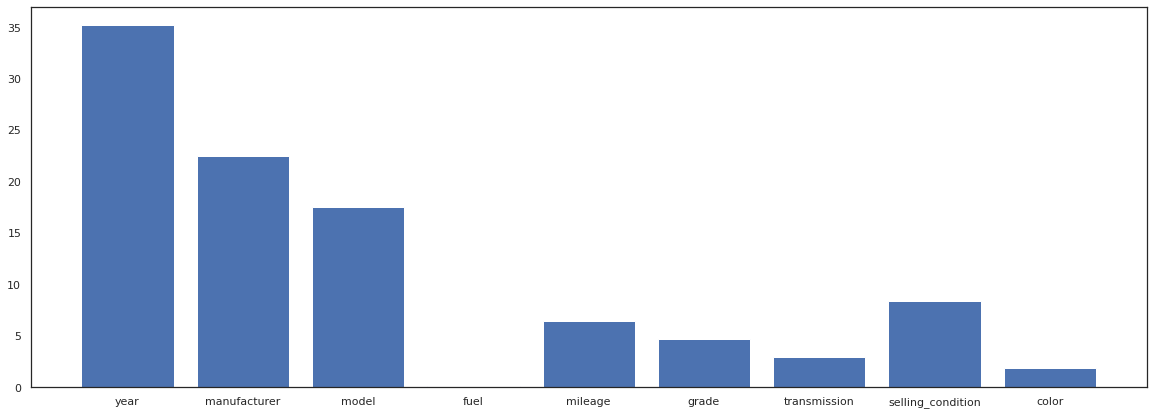

In [ ]:
n_c = []
imp_c = []
for name, importance in zip(df_n1.columns[:-1], cat_reg.feature_importances_):
  print(name, "=", importance)
  n_c.append(name)
  imp_c.append(importance)

plt.figure(figsize=(20,7))  
plt.bar(n_c, imp_c)
plt.show()


From the observations of all the models that have been trained, the *Cat Boost Regressor* performed the best with R2 score of 0.793.

From the feature importance plot, we can see that the *fuel* and *color* feature have the least effect/importance on the models price prediction so we would drop those features and retrain all the models

#####With Feature Selection(Removed *Fuel* and *Color* features)

In [ ]:
# rearrange columns for simplicity
df_n1 = df_n[['year','manufacturer','model','mileage', 'grade', 'transmission', 'selling_condition', 'price']]

In [ ]:
# selecting features, X
X = df_n1.iloc[:, :-1].values
# selecting labels, y
y = df_n1.iloc[:, -1].values

In [ ]:
# to split the data
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (2004, 7) (2004,)
Test set:  (502, 7) (502,)


In [ ]:
# define scaler
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()
# fit scaler on the training dataset
scaler_std.fit(X_train)
# save the scaler
pickle.dump(scaler_std, open('standard_scaler.pkl', 'wb'))
# transform the training dataset
X_train_scaled = scaler_std.transform(X_train)
# transform the test dataset
X_test_scaled = scaler_std.transform(X_test)

In [ ]:
# copy to drive
! cp '/content/standard_scaler.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'

In [ ]:
X_test[0]

array([  2012,     14,     30, 103412,      1,      0,      1])

In [ ]:
X_test_scaled[0]

array([ 1.15182318, -1.04327073, -1.26450474, -0.65242525, -1.09843943,
       -0.29904409,  0.59425564])

***For prediction purposes*: The data must be arranged in the same order it was arranged when scaling and it must be a 2d array**

In [ ]:
v = [[2000,0,46,1,344345,2,1,0,17]] # must be a 2D array
v_s = scaler.transform(v)

In [ ]:
v_s

array([[0.33333333, 0.        , 0.13981763, 0.2       , 0.99615244,
        0.5       , 0.33333333, 0.        , 0.94444444]])

######**Linear Regression**

In [ ]:
def evaluate(model, test_features, test_labels, set_type):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    if set_type == 'train':
      print('Model Train Performance')
    else:
      print('Model Test Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [ ]:
# to create the linear reg model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)  # fit the model to train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# to evaluate test set values
y_pred = lin_reg.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred), 3))

Mean Absolute Error:  756188.831
Mean Squared Error:  960560509817.591
Root Mean Squared Error:  980081.889
R2 score:  0.553


In [ ]:
evaluate(lin_reg, X_train_scaled, y_train, 'train')
evaluate(lin_reg, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 53.42%.
Model Test Performance
Accuracy = 51.69%.


######**Polynomial regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial transformation of degree 2
poly_features = PolynomialFeatures(degree = 2)
# Returns a transformed version of X with new features
poly_features.fit(X_train_scaled)
X_train_scaled_poly = poly_features.transform(X_train_scaled)
# save the scaler
pickle.dump(poly_features, open('poly_feature.pkl', 'wb'))
# transform test
X_test_scaled_poly = poly_features.transform(X_test_scaled)


In [ ]:
poly_reg = LinearRegression()
poly_reg_score = cross_val_score(poly_reg, X_train_scaled_poly, y_train, verbose = 2)
poly_reg_score

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.55697365, 0.63224451, 0.56987173, 0.57861949, 0.53072104])

In [ ]:
poly_reg.fit(X_train_scaled_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_scaled_poly)
poly_reg.score(X_test_scaled_poly, y_test)

0.5864576755268884

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred_poly), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred_poly), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred_poly), 3))

Mean Absolute Error:  699129.797
Mean Squared Error:  888713241609.155
Root Mean Squared Error:  942715.886
R2 score:  0.586


######**Decision Trees**

In [ ]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_scaled, y_train.ravel())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_predDT = dec_tree.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predDT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predDT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predDT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predDT), 3))

Mean Absolute Error:  670758.833
Mean Squared Error:  1016665600294.733
Root Mean Squared Error:  1008298.369
R2 score:  0.527


In [ ]:
evaluate(dec_tree, X_train_scaled, y_train, 'train')
evaluate(dec_tree, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 100.00%.
Model Test Performance
Accuracy = 62.12%.


In [ ]:
param_grid = {'max_features': ['auto', 'sqrt'],
              'max_depth': np.arange(5, 36, 5),
              'min_samples_split': [5, 10, 20, 40],
              'min_samples_leaf': [2, 6, 12, 24],
             }
tree_reg = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
tree_reg.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Randomized Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          tree_reg.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          tree_reg.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          tree_reg.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.4s



 Results from Randomized Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

 The best score across ALL searched params:
 0.5888759975217136

 The best parameters across ALL searched params:
 {'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 30}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.1s finished


In [ ]:
new_dec_tree = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=6, max_features='auto', max_depth=30, random_state=42)
new_dec_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_predDT = new_dec_tree.predict(X_test_scaled)
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predDT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predDT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predDT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predDT), 3))

Mean Absolute Error:  657875.24
Mean Squared Error:  906639170511.147
Root Mean Squared Error:  952176.019
R2 score:  0.578


In [ ]:
evaluate(new_dec_tree, X_train_scaled, y_train, 'train')
evaluate(new_dec_tree, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 76.18%.
Model Test Performance
Accuracy = 60.76%.


######**Random Forest Regressor**

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_estimators=800)
rfr.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predRF = rfr.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  530208.749
Mean Squared Error:  546807801930.65
Root Mean Squared Error:  739464.537
R2 score:  0.746


In [ ]:
evaluate(rfr, X_train_scaled, y_train, 'train')
evaluate(rfr, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 88.65%.
Model Test Performance
Accuracy = 66.95%.


In [ ]:
# save the rf boost model
pickle.dump(rfr, open('random_forest_model.pkl', 'wb'))

In [ ]:
! cp '/content/random_forest_model.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'

In [ ]:
# to find the best parameters for random forest

model = RandomForestRegressor()
n_estimators = [10, 50, 100, 250, 400, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

parameters = {'n_estimators': n_estimators,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
              'max_features': max_features}

grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train_scaled, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6445208836094247

 The best parameters across ALL searched params:
 {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
# using best parameters from grid search
rfr1 = RandomForestRegressor(random_state=42, n_estimators=900, min_samples_split=5)
rfr1.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predRF = rfr1.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  530887.424
Mean Squared Error:  546424908088.946
Root Mean Squared Error:  739205.593
R2 score:  0.746


In [ ]:
evaluate(rfr1, X_train_scaled, y_train, 'train')
evaluate(rfr1, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 85.11%.
Model Test Performance
Accuracy = 66.76%.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 20, 40]
min_samples_leaf = [1, 2, 4, 6, 12, 24]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

# Results from Randomized Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          rf_random.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          rf_random.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          rf_random.best_params_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  6.4min finished



 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.657654445506191

 The best parameters across ALL searched params:
 {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}


In [ ]:
# using best parameters from randomized search
rfr2 = RandomForestRegressor(random_state=42, n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_depth=30)
rfr2.fit(X_train_scaled, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predRF = rfr2.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predRF), 3))

Mean Absolute Error:  528712.744
Mean Squared Error:  551136040539.684
Root Mean Squared Error:  742385.372
R2 score:  0.744


In [ ]:
evaluate(rfr2, X_train_scaled, y_train, 'train')
evaluate(rfr2, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 84.22%.
Model Test Performance
Accuracy = 67.25%.


######**Extra Trees Regressor**

In [ ]:
et = ExtraTreesRegressor(n_estimators=800, random_state=42)
et.fit(X_train_scaled, y_train.ravel())

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=800, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predET = et.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predET), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predET), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predET)), 3))
print('R2 score: ', round(r2_score(y_test, y_predET), 3))

Mean Absolute Error:  582473.896
Mean Squared Error:  674174841292.232
Root Mean Squared Error:  821081.507
R2 score:  0.686


In [ ]:
evaluate(et, X_train_scaled, y_train, 'train')
evaluate(et, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 100.00%.
Model Test Performance
Accuracy = 64.95%.


######**ADA BOOST REGRESSOR**

In [ ]:
ada = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=800, learning_rate=1.5, random_state=42)
ada.fit(X_train_scaled, y_train.ravel())

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [ ]:
y_predADA = ada.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predADA), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predADA), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predADA)), 3))
print('R2 score: ', round(r2_score(y_test, y_predADA), 3))

Mean Absolute Error:  488486.934
Mean Squared Error:  470341110684.922
Root Mean Squared Error:  685814.195
R2 score:  0.781


In [ ]:
evaluate(ada, X_train_scaled, y_train, 'train')
evaluate(ada, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 92.66%.
Model Test Performance
Accuracy = 70.18%.


In [ ]:
# save the rf boost model
pickle.dump(ada, open('adaboost_model.pkl', 'wb'))
# copy to drive
! cp '/content/adaboost_model.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'

######**XGBRegressor**

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train.ravel())

[23:45:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_predXGB = xgb.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGB), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGB), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGB)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGB), 3))

Mean Absolute Error:  489606.09
Mean Squared Error:  475481168858.431
Root Mean Squared Error:  689551.426
R2 score:  0.779


In [ ]:
evaluate(xgb, X_train_scaled, y_train, 'train')
evaluate(xgb, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 84.95%.
Model Test Performance
Accuracy = 71.40%.


In [ ]:
# save the xgboost model
pickle.dump(xgb, open('xgbregressor_model.pkl', 'wb'))
# copy to drive
! cp '/content/xgbregressor_model.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'

######**XGBRFRegressor**

In [ ]:
xgbrf = XGBRFRegressor(n_estimators=100, random_state=42)
xgbrf.fit(X_train_scaled, y_train.ravel())

[23:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_predXGBRF = xgbrf.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predXGBRF), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predXGBRF), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predXGBRF)), 3))
print('R2 score: ', round(r2_score(y_test, y_predXGBRF), 3))

Mean Absolute Error:  756567.659
Mean Squared Error:  957181791475.989
Root Mean Squared Error:  978356.679
R2 score:  0.555


In [ ]:
evaluate(xgbrf, X_train_scaled, y_train, 'train')
evaluate(xgbrf, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 53.85%.
Model Test Performance
Accuracy = 47.08%.


######**LGBMRegressor**

In [ ]:
lgbm = LGBMRegressor(n_estimators=200, random_state=42)
lgbm.fit(X_train_scaled, y_train.ravel())

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_predLGBM = lgbm.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predLGBM), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predLGBM), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predLGBM)), 3))
print('R2 score: ', round(r2_score(y_test, y_predLGBM), 3))

Mean Absolute Error:  468096.787
Mean Squared Error:  448422407622.148
Root Mean Squared Error:  669643.493
R2 score:  0.791


In [ ]:
evaluate(lgbm, X_train_scaled, y_train, 'train')
evaluate(lgbm, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 84.72%.
Model Test Performance
Accuracy = 72.57%.


In [ ]:
# save the lgbm regressor model
pickle.dump(lgbm, open('lgbmregressor_model.pkl', 'wb'))
# copy to drive
! cp '/content/lgbmregressor_model.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'

######**CATBOOST REGRESSOR**

In [ ]:
# to find the best parameters for catboost
from sklearn.model_selection import GridSearchCV
model = CatBoostRegressor()
parameters = {'depth'         : [6,8,10,12,14,16,18,20],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
              'iterations'    : [30, 50, 100]
              }
grid = GridSearchCV(model, parameters, cv = 2, n_jobs=-1)
gs = grid.fit(X_train_scaled, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          gs.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          gs.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          gs.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 1232216.0693707	total: 60.3ms	remaining: 2.96s
1:	learn: 1090019.9182493	total: 62.1ms	remaining: 1.49s
2:	learn: 997860.8418371	total: 65.8ms	remaining: 1.03s
3:	learn: 970605.2426200	total: 69.3ms	remaining: 797ms
4:	learn: 920584.4621708	total: 72.9ms	remaining: 656ms
5:	learn: 856391.1478283	total: 76.5ms	remaining: 561ms
6:	learn: 839196.3777955	total: 79.9ms	remaining: 491ms
7:	learn: 810699.8755751	total: 83.4ms	remaining: 438ms
8:	learn: 797706.8159678	total: 88.4ms	remaining: 403ms
9:	learn: 792037.1273157	total: 90.6ms	remaining: 362ms
10:	learn: 778037.1598854	total: 93.5ms	remaining: 332ms
11:	learn: 771648.8350234	total: 97.1ms	remaining: 308ms
12:	learn: 764260.9890579	total: 101ms	remaining: 287ms
13:	learn: 752339.9146515	total: 104ms	remaining: 268ms
14:	learn: 746377.8341925	total: 108ms	remaining: 251ms
15:	learn: 741545.4527722	total: 111ms	remaining: 237ms
16:	learn: 737654.4836352	total: 115ms	remaining: 223ms
17:	learn: 725161.8233647	total: 119ms	remai

In [ ]:
#using the best parameters gotten above
cat_reg = CatBoostRegressor(depth=6, iterations=300, learning_rate=0.2, random_state=42)
cat_reg.fit(X_train_scaled, y_train.ravel())

0:	learn: 1414377.0300534	total: 48.6ms	remaining: 14.5s
1:	learn: 1310440.7996106	total: 50.2ms	remaining: 7.48s
2:	learn: 1224640.9751539	total: 51.5ms	remaining: 5.1s
3:	learn: 1160193.3297610	total: 53ms	remaining: 3.92s
4:	learn: 1106201.5551511	total: 54.2ms	remaining: 3.2s
5:	learn: 1068787.4865654	total: 55.6ms	remaining: 2.72s
6:	learn: 1016673.7570898	total: 56.8ms	remaining: 2.38s
7:	learn: 982917.1013096	total: 58.1ms	remaining: 2.12s
8:	learn: 954404.2554952	total: 59.4ms	remaining: 1.92s
9:	learn: 938014.7095513	total: 60.7ms	remaining: 1.76s
10:	learn: 919275.9070522	total: 62.1ms	remaining: 1.63s
11:	learn: 897963.0274123	total: 63.5ms	remaining: 1.52s
12:	learn: 889505.2158141	total: 64.9ms	remaining: 1.43s
13:	learn: 880868.0449003	total: 66.1ms	remaining: 1.35s
14:	learn: 870347.7691667	total: 67.5ms	remaining: 1.28s
15:	learn: 852093.7590971	total: 69.2ms	remaining: 1.23s
16:	learn: 846423.1482442	total: 70.6ms	remaining: 1.17s
17:	learn: 837840.6412946	total: 72.3m

In [ ]:
y_predCAT = cat_reg.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predCAT), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predCAT), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predCAT)), 3))
print('R2 score: ', round(r2_score(y_test, y_predCAT), 3))

Mean Absolute Error:  464096.467
Mean Squared Error:  431175020118.931
Root Mean Squared Error:  656639.186
R2 score:  0.799


In [ ]:
evaluate(cat_reg, X_train_scaled, y_train, 'train')
evaluate(cat_reg, X_test_scaled, y_test, 'test')

Model Train Performance
Accuracy = 83.95%.
Model Test Performance
Accuracy = 73.01%.


In [ ]:
# save the cat boost model
pickle.dump(cat_reg, open('cat_boost_model.pkl', 'wb'))
# copy to drive
! cp '/content/cat_boost_model.pkl' '/content/drive/MyDrive/models_features-fuel&color_scaled'

year = 30.482195753252956
manufacturer = 24.10450648460858
model = 19.447201380037242
mileage = 8.573136979393666
grade = 6.085899340646756
transmission = 2.968526856473319
selling_condition = 8.338533205587481


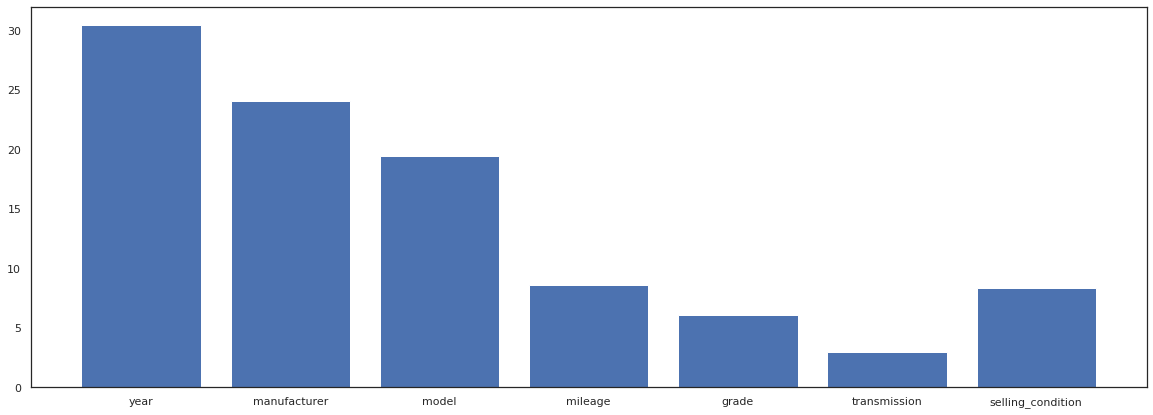

In [ ]:
# feature importance plot
n_c = []
imp_c = []
for name, importance in zip(df_n1.columns[:-1], cat_reg.feature_importances_):
  print(name, "=", importance)
  n_c.append(name)
  imp_c.append(importance)

plt.figure(figsize=(20,7))  
plt.bar(n_c, imp_c)
plt.show()


From the observations of all the models that have been trained using the reduced features, majority of the models performed better than when all the features were used.

The *Cat Boost Regressor* performed the best with R2 score of 0.799.

####Predictions

In [ ]:
# loading all the encoders, scalers and models saved
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/color_encoder.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/fuel_encoder.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/grade_encoder.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/manufacturer_encoder.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/model_encoder.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/selling_condition_encoder.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/transmission_encoder.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/standard_scaler.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/cat_boost_model.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/lgbmregressor_model.pkl' '/content/'
!cp '/content/drive/MyDrive/models_features-fuel&color_scaled/xgbregressor_model.pkl' '/content/'

In [ ]:
# predicting a car price
yr= 2002
man = 'TOYOTA'
mod = 'HIGHLANDER'
mileage = 175000
grade = 'C'
trans = 'AUTOMATIC'
sell_cond = 'NIGERIAN Used'

# YEAR
if yr != '' and yr != ' ':
  yr = yr
else:
  yr = np.nan

# mileage
if mileage != '' and mileage != ' ':
  mileage = mileage
else:
  mileage = np.nan

# encode categorial features

# manufacturer
if man != '' and man != ' ':
  man_enco = pickle.load(open('manufacturer_encoder.pkl', 'rb'))
  man_not_encoded =  np.array(man.lower()).ravel()
  man_encoded = man_enco.transform(man_not_encoded)[0]
else:
  man_encoded = np.nan

# model
if mod != '' and mod != ' ':
  mod_enco = pickle.load(open('model_encoder.pkl', 'rb'))
  mod_not_encoded =  np.array(mod.lower()).ravel()
  mod_encoded = mod_enco.transform(mod_not_encoded)[0]
else:
  mod_encoded = np.nan

# grade
if grade != '' and grade != ' ':
  grade_enco = pickle.load(open('grade_encoder.pkl', 'rb'))
  grade_not_encoded =  np.array(grade.lower()).ravel()
  grade_encoded = grade_enco.transform(grade_not_encoded)[0]
else:
  grade_encoded = np.nan

# transmission
if trans != '' and trans != ' ':
  transmission__enco = pickle.load(open('transmission_encoder.pkl', 'rb'))
  transmission__not_encoded =  np.array(trans.lower()).ravel()
  transmission_encoded = transmission__enco.transform(transmission__not_encoded)[0]
else:
  transmission_encoded = np.nan

# selling_condition
if sell_cond != '' and sell_cond != ' ':
  selling_condition_enco = pickle.load(open('selling_condition_encoder.pkl', 'rb'))
  selling_condition_not_encoded =  np.array(sell_cond.lower()).ravel()
  selling_condition_encoded = selling_condition_enco.transform(selling_condition_not_encoded)[0]
else:
  selling_condition_encoded = np.nan


*Format to arrange the car details in the array for normalisation*

[['year', 'manufacturer', 'model', 'fuel', 'mileage', 'grade', 'transmission', 'selling_condition', 'color', 'price']]

In [ ]:
# prepare the car data for normalisation
car = np.array([yr, man_encoded, mod_encoded, mileage, grade_encoded, transmission_encoded, selling_condition_encoded])
car = np.array([car])

In [ ]:
car

array([[2.002e+03, 4.500e+01, 1.630e+02, 1.750e+05, 1.000e+00, 0.000e+00,
        1.000e+00]])

In [ ]:
# load the scaler
std_sc = pickle.load(open('standard_scaler.pkl', 'rb'))
# transform the car 
car_scaled = std_sc.transform(car)
car_scaled

array([[-1.06722474,  1.14581127,  0.16680701,  0.37785293, -1.09843943,
        -0.29904409,  0.59425564]])

In [ ]:
# load the model(CATBOOST)
model_CAT = pickle.load(open('/content/cat_boost_model.pkl', 'rb'))

In [ ]:
car_predict = model_CAT.predict(car_scaled)
car_predict = round(car_predict[0])
print(f'The price of the car is {car_predict:,} naira')

The price of the car is 1,922,183 naira


In [ ]:
# load the model(LGBM)
model_LGBM1 = pickle.load(open('/content/lgbmregressor_model.pkl', 'rb'))

In [ ]:
car_predict = model_LGBM1.predict(car_scaled)
car_predict = round(car_predict[0])
print(f'The price of the car is {car_predict:,} naira')

The price of the car is 1,768,423 naira


In [ ]:
# load the model(XGB)
model_XGB = pickle.load(open('/content/xgbregressor_model.pkl', 'rb'))

[15:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
car_predict = model_XGB.predict(car_scaled)
car_predict = round(car_predict[0]) 
print(f'The price of the car is {car_predict:,} naira')

The price of the car is 3,457,569 naira


From the training and prediction observations, we will use the CatBoost Regressor model for deployment on Flask